------COMPTE RENDU MBODE JOSEPH INSTRU 2 -----------

--------TD TP3 APPRENTISSAGE NON SUPERVISE------------

In [100]:
import matplotlib.pyplot as plt
import numpy as np

Exercice 1 : CLustering

In [101]:
from sklearn.datasets import make_blobs


1- Jeu de données

In [102]:
X,y = make_blobs(n_samples=100,centers=3,n_features = 2, random_state=0)

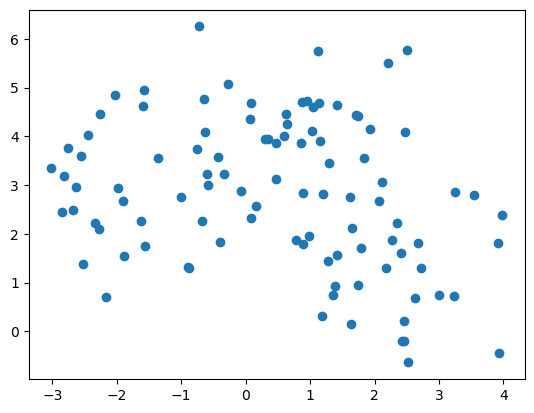

In [103]:
plt.scatter(X[:,0],X[:,1])

2-Modèle 

In [104]:
#a) module pour former des clusters
from sklearn.cluster import KMeans

In [105]:
#b) Caractéristiques des hyperparamètres
model = KMeans(n_clusters=3)   #regroupement de 3 clusters

3- Entraiement

In [106]:
model.fit(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

4- Prédiction du modèle

In [107]:
model.predict(X)


array([1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

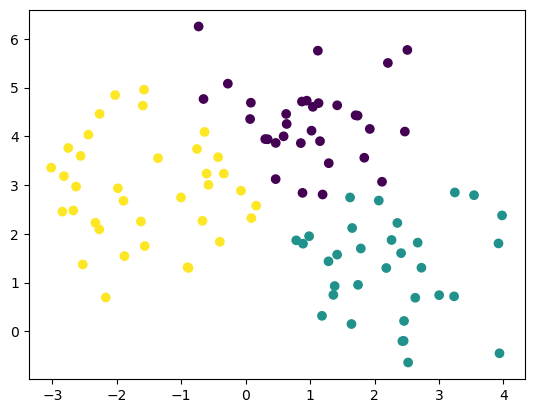

In [108]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

5- Affichage des Centroides

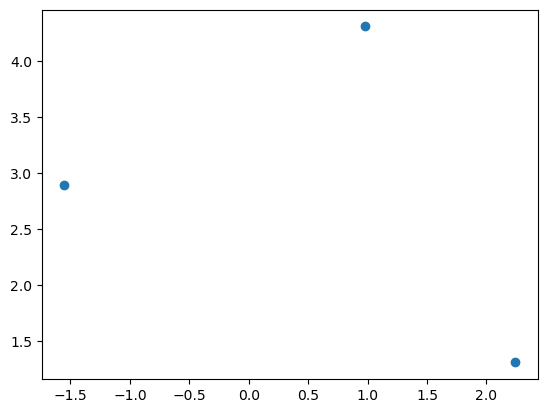

In [109]:
model.cluster_centers_
model.cluster_centers_[:,0]
model.cluster_centers_[:,1]
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])

 6- Utilité des centroides

7- Coût engendré par le modèle

In [110]:
print('le coût engendré par ce modele est :',model.inertia_)

le coût engendré par ce modele est : 167.75875127963718


8-Evaluation du modèle

In [111]:
print('le score de ce model est de :',model.score(X))

le score de ce model est de : -167.7587512796372


9- <<'Elbow Method '>> : déterminons la zone de coude 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'cout du modèle(Inertia)')

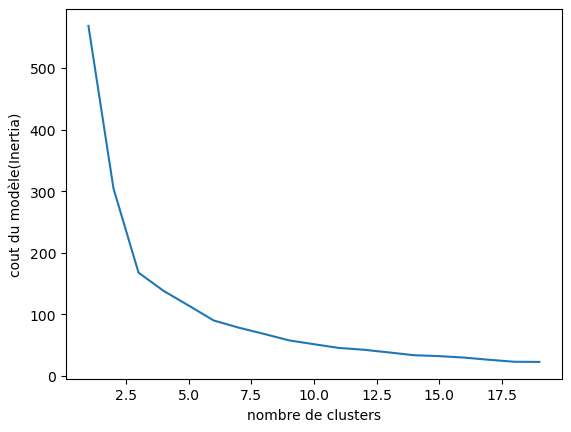

In [112]:
inertia = [] #variable pour stocker les valeurs de l'inertie 
K_range = range(1,20) #on va considérer maximiser le nbre de clusters au fur et à mesure
for k in K_range: #pour chaque nombre de cluster
    model = KMeans(n_clusters=k).fit(X)#on entraine le modèle
    inertia.append(model.inertia_) #on stocke la valeur de l'inertie dans la variable inertia
plt.plot(K_range,inertia) #on trace la fonction du nombre du cooût du modèle (inertie) en focntion du nbre de clusters
plt.xlabel('nombre de clusters')
plt.ylabel('cout du modèle(Inertia)')

Exercice 2 : Détection d'anomalie ( ISOLATION FOREST ALGORITHM)

1- Jeu de données

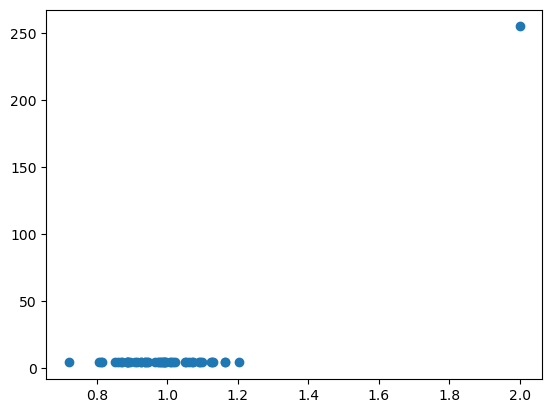

In [113]:
X,y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:]=np.array([2,255])
plt.scatter(X[:,0],X[:,1])

2 - Algoritme Isolation Forest

In [114]:
#a) Librairie
from sklearn.ensemble import IsolationForest

In [115]:
#b) Sélection du modèle
model = IsolationForest(contamination=0.01)

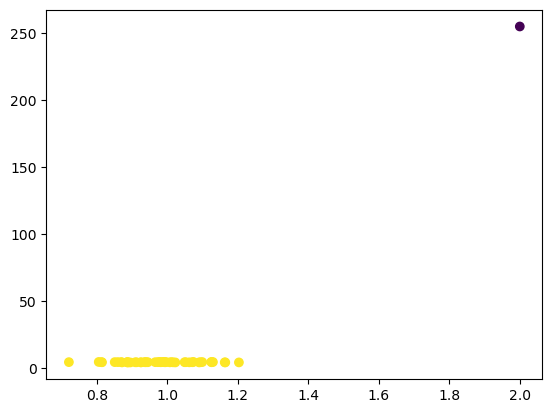

In [116]:
#c) Entraiement et prédiction du modèle
model.fit(X)
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

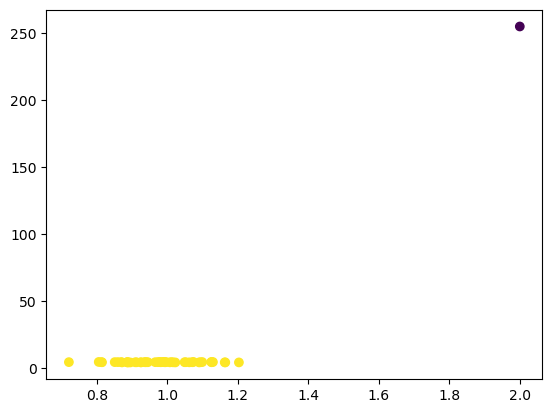

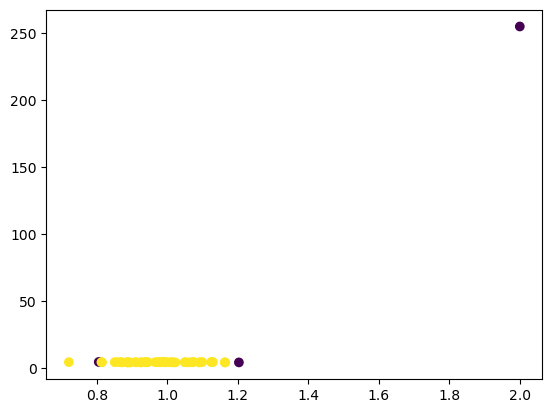

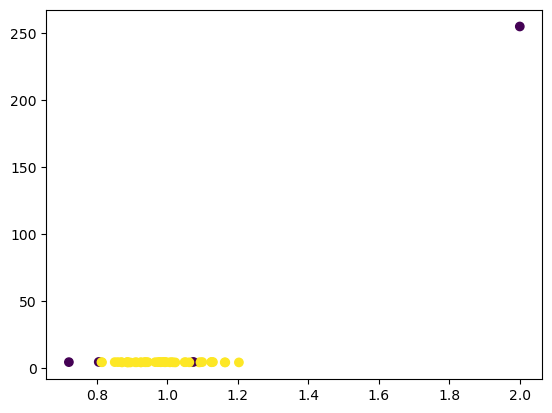

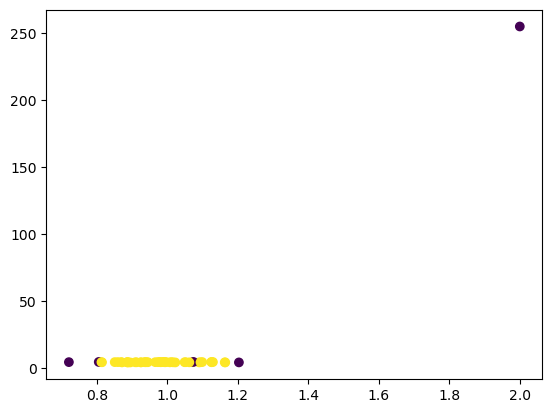

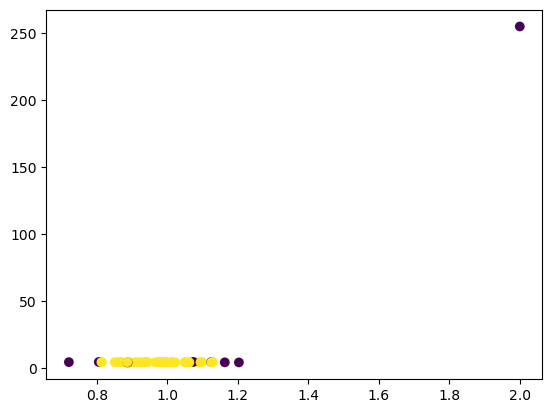

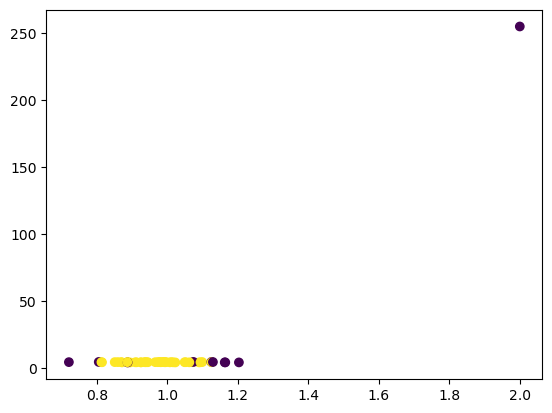

In [117]:
#d) modification de l'hyperparamètre
taux = [0.01, 0.05, 0.07,0.1, 0.15, 0.2]
for i in taux:
    model = IsolationForest(contamination=i)
    model.fit(X)
    plt.scatter(X[:,0],X[:,1],c=model.predict(X))
    plt.show()

Exercice 3 : DETECTION DES CHIFFRES MALS ECRITS DANS LA BASE "DIGITS"
            (ISOLATION FOREST ALGORITHM)

Le but ici sera de rétirer les chiffres mals écrits dans cette base 

1- Librairie du jeu

In [118]:
from sklearn.datasets import load_digits

2- Jeu de données des chiffres manuscrits représentés en image

In [98]:
digits = load_digits()
Images = digits.images

3- Images et target

In [121]:
X=digits.data
y=digits.target

4- d'après print(X.shape)

In [124]:
print(X.shape)

(1797, 64)


X est une matrice 1797 images et 64 pixels
l'image devrait être une matrice 8 lignes et 8 colonnes


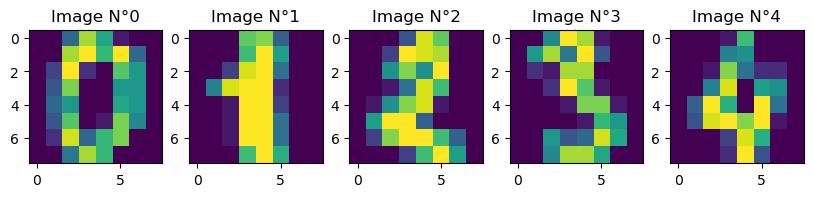

In [177]:
#a) taille de X
print('X est une matrice 1797 images et 64 pixels')

#b)taille de l'image
print("l'image devrait être une matrice 8 lignes et 8 colonnes")

#c)visaulisation de quelques images
#plt.imshow(Images[1])
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(Images[i])
    plt.title('Image N°{}'.format(i))

5 -Modèle FOREST

In [178]:
model = IsolationForest(random_state=0,contamination=0.02)

6-Entrainement du modèle

In [179]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

7- Evaluation du modèle

In [180]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

8- Filtrage prédictions = -1 

In [181]:
outliers = model.predict(X)==-1

In [182]:
#analyse du contenu
nbre_err = 0
for i in range(len(outliers)):
    if outliers[i]==True:
        nbre_err+=1
print('On trouve finalement {} de digits incorrects dans outliers'.format(nbre_err))

On trouve finalement 36 de digits incorrects dans outliers


9-Images des Outliers

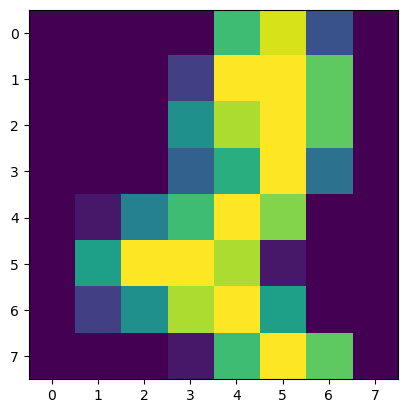

In [183]:
plt.imshow(Images[outliers][0])

10- Modif de l'hyperparamètre contamination et impact

On trouve finalement 36 de digits incorrects dans outliers
On trouve finalement 90 de digits incorrects dans outliers
On trouve finalement 144 de digits incorrects dans outliers
On trouve finalement 180 de digits incorrects dans outliers
On trouve finalement 539 de digits incorrects dans outliers
On trouve finalement 898 de digits incorrects dans outliers


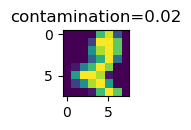

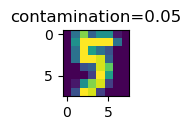

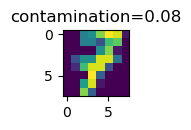

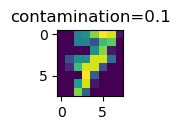

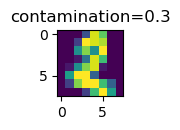

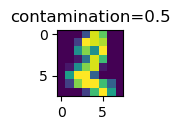

In [191]:
contamination_ = [0.02, 0.05, 0.08, 0.1, 0.3, 0.5]
for i in range(len(contamination_)):
    model = IsolationForest(random_state=0,contamination=contamination_[i])
    model.fit(X)
    model.predict(X)
    outliers = model.predict(X)==-1
    nbre_err = 0
    for j in range(len(outliers)):
        if outliers[j]==True:
            nbre_err+=1
    print('On trouve finalement {} de digits incorrects dans outliers'.format(nbre_err))
#print('Affichage des premières images fausses pour chaque valeur de la contamination')
    plt.figure(figsize=(10,6))
    plt.subplot(6,1,i+1)
    plt.title('contamination={}'.format(contamination_[i]))
    plt.imshow(Images[outliers][0])
   

Exercice 4 : REDUCTION DE LA DIMMENSIONNALITE( ANALYSE DES COMPOSANTES PRINCIPALES, (PCA POUR PRINCIPAL COMPONENTS ANALYSIS))

A) Telechargement du jeu de données

1-Importation Librairie

In [193]:
from sklearn.datasets import load_digits

2- Images représentantes les chiffres manuscrits

In [195]:
digits = load_digits()
images = digits.images

3-Récuperation des images et targets

In [194]:
X=digits.data
y=digits.target

4-Dimension du jeu

In [197]:
print(X.shape)

(1797, 64)


In [1]:
print('on a 1797 images et chacune a 64 variables')

on a 1797 images et chacune a 64 variables


B) Visualisation des données

1- Chargement du PCA

In [199]:
from sklearn.decomposition import PCA

2- Modèle PCA

In [200]:
model = PCA(n_components=2)

3- Entrainement

In [204]:
X_reduced = model.fit_transform(X)

4- Dimension du tableau

In [206]:
X_reduced.shape

(1797, 2)

In [207]:
X_reduced 

array([[ -1.25946729,  21.27488561],
       [  7.95760999, -20.76869199],
       [  6.99192474,  -9.95599289],
       ...,
       [ 10.8012844 ,  -6.96025286],
       [ -4.87210066,  12.42395721],
       [ -0.34438821,   6.36554304]])

In [2]:
print("1797 lignes:images et 2 colonnes d'images: variables") 

1797 lignes:images et 2 colonnes d'images: variables


5- Composantes de X_reduced

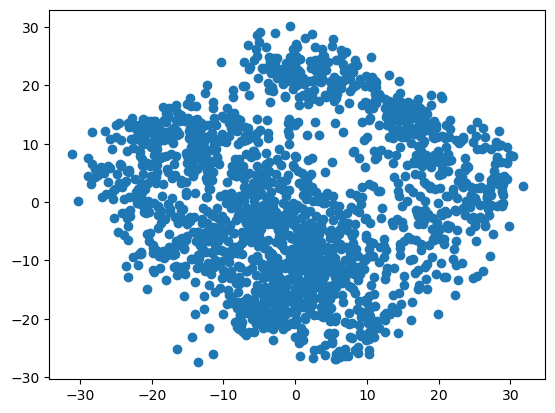

In [209]:
plt.scatter(X_reduced[:,0],X_reduced[:,1])

6- Ajout des couleurs au graphique

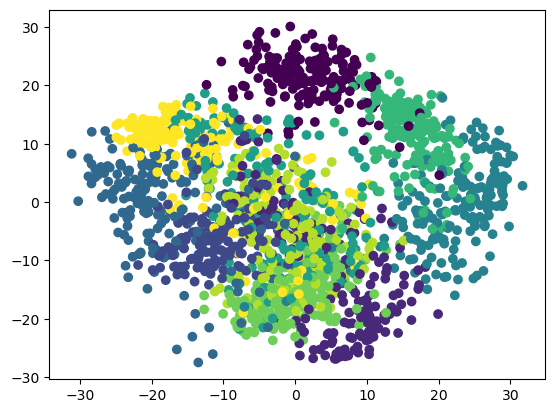

In [212]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)

7- Visualisation avec Barre de couleur

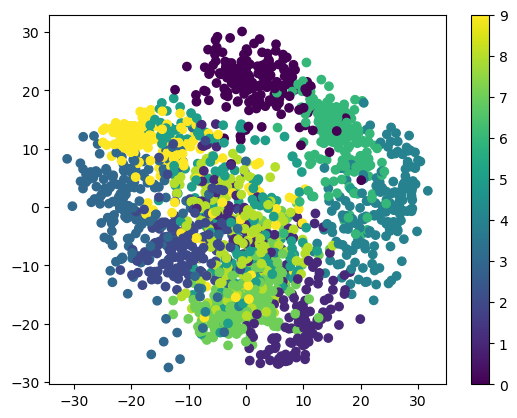

In [213]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.colorbar()

8-Interpretation

9-Signification des axes

10- Analyse des composantes

In [215]:
model.components_.shape

(2, 64)

C) Compressions de données

1-Entrainement du modèle sur le même nombre de dimension que X

In [223]:
d=X.shape[1]
model = PCA(n_components=d)

2-Entrainement

In [225]:
X_reduced=model.fit_transform(X)

3- Pourcentage de variance à préserver

In [227]:
print('pour chacune des 64 composantes, on a ces pourcentages de variance {}'.format(model.explained_variance_ratio_))

pour chacune des 64 composantes, on a ces pourcentages de variance [1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.

4- Somme cumulée des variances

In [228]:
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

5- Tracé du % de variance cumulée en fonction du nombre de composantes

Text(0, 0.5, 'variance cumulée')

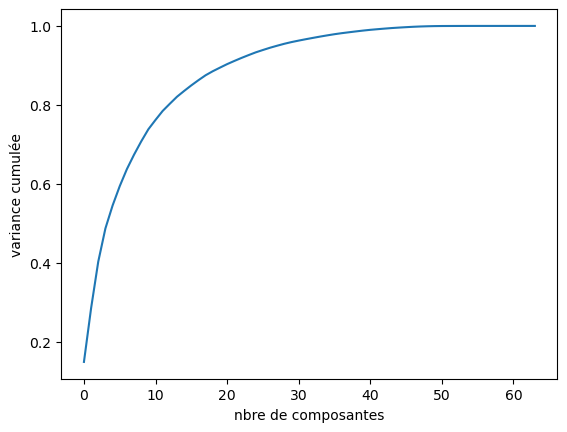

In [252]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('nbre de composantes')
plt.ylabel('variance cumulée')

6-Nombre de composantes pour avoir les 90% 

7-Composante poutr avoir les 99%

In [254]:
print('{} composantes ont une variance >=99%'.format(np.argmax(np.cumsum(model.explained_variance_ratio_)>=0.99)+1))

41 composantes ont une variance >=99%


8-Nouvel entrainement pour 41 composantes

In [255]:
model = PCA(n_components=41)
X_reduced=model.fit_transform(X)

9- Decompression des images

In [256]:
X_recovered = model.inverse_transform(X_reduced)

10-Affichage d'une image

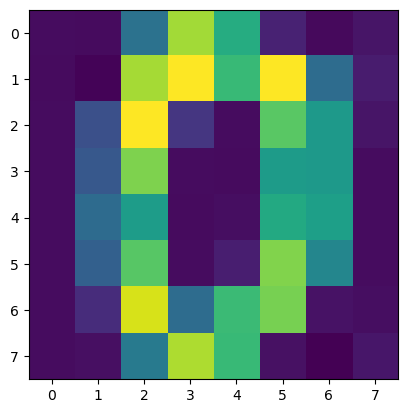

In [260]:
plt.imshow(X_recovered[0].reshape((8,8)))

on a une baisse de la qualité de l'imaage

11-Vérification du nombres de composantes utilisés

In [279]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
data_resscaled = scaler.fit_transform(X) 

pca = PCA(n_components=0.4) 
pca.fit(data_resscaled)
reduced = pca.transform(data_resscaled) 
print('nombre de composant utilisées est de {}% de la variance totale'.format(pca.n_components))
print('Autrement dit {} composantes'.format(np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.4) + 1))

nombre de composant utilisées est de 0.4% de la variance totale
Autrement dit 3 composantes


12- Impact de la réduction du nombre de composante

Nombre de composantes : 3
Nombre de composantes : 5
Nombre de composantes : 9
Nombre de composantes : 21


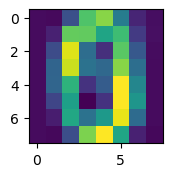

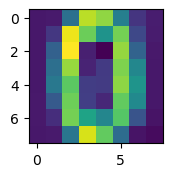

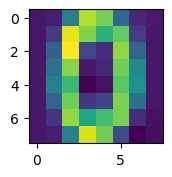

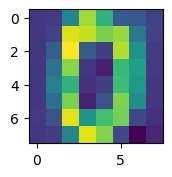

In [285]:
variances = [0.3, 0.5, 0.7, 0.9]

for j in range(len(variances)):
    pca = PCA(n_components=variances[j])
    pca.fit(X)
    
    X_reduced = pca.transform(X) #trabnfromation
    X_recovered = pca.inverse_transform(X_reduced) #réduction
    
    print("Nombre de composantes :", pca.n_components_)
    plt.figure(figsize=(12,8))
    plt.subplot(4,1,j+1)
    plt.imshow(X_recovered[0].reshape(8,8))